# Putting It All Together

Import the libraries/packages we will need.

In [1]:
####Imports
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import string
import pandas as pd
import os

## Variables

### Part of Speech Map
mapping specific UPenn tags to more general groups.

In [2]:
####Variables
pos_map = {
    'CC':'Misc',
    'CD':'Adjective',
    'DT':'Determiner',
    'EX':'Existential',
    'FW':'Foreign',
    'IN':'Misc',
    'JJ':'Adjective',
    'JJR':'Adjective',
    'JJS':'Adjective',
    'MD':'Verb',
    'NN':'Noun',
    'NNS':'Noun',
    'NNP':'Noun',
    'NNPS':'Noun',
    'PDT':'Determiner',
    'POS':'Misc',
    'PRP':'Pronoun',
    'PRP$':'Pronoun',
    'RB':'Adverb',
    'RBR':'Adverb',
    'RBS':'Adverb',
    'RP':'Adverb',
    'SYM':'Misc',
    'TO':'Misc',
    'UH':'Misc',
    'VB':'Verb',
    'VBZ':'Verb',
    'VBP':'Verb',
    'VBD':'Verb',
    'VBN':'Verb',
    'VBG':'Verb',
    'WDT':'Determiner',
    'WP':'Pronoun',
    'WP$':'Pronoun',
    'WRB':'Adverb',
    '.':'.',
    ',':'.',
    ':':'.',
    '(':'Misc',
    ')':'Misc',
    "''":'Misc',
    "``":'Misc',
    '$':'Misc',
}

## Clauses/Word Groups
Used to detect clause types, intensifiers, and pronouns.

In [3]:
intensifiers = ['amazingly', 'astoundingly', 'dreadfully', 'colossally', 'especially', 'exceptionally',
                'excessively', 'extremely', 'extraordinarily', 'fantastically', 'frightfully', 'fully', 
                'incredibly', 'literally', 'mightily', 'moderately', 'most', 'outrageously', 
                'phenomenally', 'quite', 'radically', 'rather', 'real', 'really', 'remarkably', 'right', 
                'somewhat', 'strikingly', 'super', 'supremely', 'surpassingly', 'terribly', 
                'terrifically', 'too', 'totally', 'uncommonly', 'unusually', 'veritable', 'very']
    
pronouns = ['ourselves', 'she', 'themselves', 'you', 'ours', 'it', 'yourself', 'yourselves', 
                'itself', 'my', 'hers', 'her', 'theirs', 'we', 'i', 'me', 'myself', 'your', 'yours', 
                'them', 'our', 'himself', 'his', 'their', 'they', 'mine', 'herself', 'us', 'its', 'he', 'him']
    
similarity_clauses = ['in the first place', 'not only', 'as a matter of fact', 'in like manner', 'in addition',
                      'coupled with', 'in the same fashion', 'in the same way', 'first, second, third', 
                      'in the light of', 'not to mention', 'to say nothing of', 'equally important', 
                      'by the same token', 'again', 'equally', 'identically', 
                      'uniquely', 'like', 'too', 'moreover', 'as well as', 'together with', 'of course', 
                      'likewise', 'comparatively', 'correspondingly', 'similarly', 'furthermore', 'additionally']

opposition_clauses = ['although this may be true', 'in contrast', 'different from', 'on the other hand', 
                          'on the contrary', 'at the same time', 'in spite of', 'even so', 'even though', 
                          'be that as it may', 'then again', 'above all', 'in reality', 'after all', 'but', 
                          'and still', 'unlike', 'and yet', 'while', 'albeit', 'besides', 'as much as', 
                          'even though', 'although', 'instead', 'whereas', 'despite', 'conversely', 'otherwise', 
                          'however', 'rather', 'nevertheless', 'nonetheless', 'regardless', 'notwithstanding']

conditional_clauses = ['in the event that', 'granted that', 'as long as', 'so long as', 'for the purpose of', 
                           'with this intention', 'with this in mind', 'in the hope that', 'to the end that', 
                           'for fear that', 'in order to', 'seeing that', 'being that', 'in view of', 'unless', 
                           'when', 'whenever', 'while', 'because of', 'while', 'lest', 'in case', 
                           'provided that', 'given that', 'only if', 'even if', 'so that', 'so as to', 'owing to', 
                           'inasmuch as', 'due to']

example_clauses = ['in other words', 'to put it differently', 'for one thing', 'as an illustration', 'in this case', 
                'for this reason', 'to put it another way', 'that is to say', 'with attention to', 'by all means', 
                'important to realize', 'another key point', 'first thing to remember', 'most compelling evidence', 
                'must be remembered', 'point often overlooked', 'to point out', 'on the positive side', 
                'on the negative side', 'with this in mind', 'notably', 'including', 'like', 'to be sure', 'namely', 
                'chiefly', 'truly', 'indeed', 'certainly', 'surely', 'markedly', 'such as', 'especially', 'explicitly', 
                'specifically', 'expressly', 'surprisingly', 'frequently', 'significantly', 'particularly', 'in fact', 
                'in general', 'in particular', 'in detail', 'for example', 'for instance', 'to demonstrate', 
                'to emphasize', 'to repeat', 'to clarify', 'to explain', 'to enumerate']

result_clauses = ['as a result', 'under those circumstances', 'in that case', 'for this reason', 'in effect', 
                      'thus', 'because the', 'hence', 'consequently', 'therefore', 'thereupon', 
                      'forthwith', 'accordingly', 'henceforth']

conclusion_clauses = ['as a result', 'under those circumstances', 'in that case', 'for this reason', 
                          'in effect', ', for', 'thus', 'because the', 'then', 'hence', 'consequently', 'therefore', 
                          'thereupon', 'forthwith', 'accordingly', 'henceforth']

sequence_clauses = ['at the present time', 'from time to time', 'sooner or later', 'at the same time',
                        'up to the present time', 'to begin with', 'in due time', 'as soon as', 'as long as',
                        'in the meantime', 'in a moment', 'without delay', 'in the first place', 'all of a sudden',
                        'at this instant', 'first', 'second ', 'immediately', 'quickly', 'finally', 'after', 'later',
                        'last', 'until', 'till', 'since', 'then', 'before', 'hence', 'since', 'when', 'once', 'about',
                        'next', 'now', 'formerly', 'suddenly', 'shortly', 'henceforth', 'whenever', 'eventually',
                        'meanwhile', 'further', 'during', 'in time', 'prior to', 'forthwith', 'straightaway ',
                        'by the time', 'whenever ', 'until now', 'now that ', 'instantly', 'presently', 'occasionally']

## Functions

### Utilities
Functions we will use to check token attributes

In [4]:
####Utilities
def is_stopword(token):
    stops = stopwords.words('english').copy()
    return token in stops

def is_punctuation(token):
    return token in string.punctuation

def is_vowel(char):
    if char in ('a','e','i','o','u','y'):
        return True
    return False

### Rhetorical Devices

### Rhetorical Question

In [5]:
####Rhetorical Devices

##Rhetorical Question
def is_rhetorical(sent):
    if sent.endswith('?'):
        return 1
    return 0

### Epitrophe

In [6]:
##Epitrophe
#takes tokens
def has_epitrophe(tokens):
    epitrophe_instances = []

    word_dist = Counter(tokens)
    repeated_words = [word for word,count in word_dist.items() if count > 1]
    
    trigrams = nltk.ngrams(tokens,3)
    for word in repeated_words:
        anchor = None
        for trigram in trigrams:
            if trigram[1] == word:
                tags = nltk.pos_tag(trigram)
                if anchor:
                    if tags[0][1] == anchor[0][1]:
                        epitrophe_instances.append((tuple([word for word,pos in anchor]), trigram))
                else:
                    anchor = tags
    return len(epitrophe_instances)  

### Alliteration

In [7]:
##Alliteration
def has_alliteration(word1, word2):
    gram00 = word1[0]
    gram10 = word2[0]
    
    if gram00==gram10:
        if is_vowel(gram00):
            return True
        else:
            if len(word1) > 1 and len(word2) > 1:
                gram01 = word1[1]
                gram11 = word2[1]
                if is_vowel(gram01) and is_vowel(gram11):
                    return (word1, word2)
                elif gram01 == gram11:
                    return (word1, word2)
    return None

In [8]:
#takes tokens
def count_alliteration(tokens):
    allit_instances = []
    #ignore stopwords
    tokens = [token for token in tokens if not(is_punctuation(token) or is_stopword(token))]
    
    bigrams = nltk.ngrams(tokens,2)
    for one,two in bigrams:
        if has_alliteration(one,two):
            allit_instances.append((one,two))
    trigrams = nltk.ngrams(tokens,3)
    for one,two,three in trigrams:
        #the not avoids double counting
        if has_alliteration(one,three) and not has_alliteration(one,two):
            allit_instances.append((one,two,three))
    return len(allit_instances)

### Clause Check

In [9]:
####Clauses
#Note: certain clauses are in multiple lists, thus there will be double counting
def contains_patterns(sent, pattern_list):
    for pattern in pattern_list:
        pattern = '(^%s)|(\s%s\s)' % (pattern,pattern,)
        m = re.search(pattern, sent)
        if m:
            return 1
    return 0

### Pronoun Distributions

In [10]:
####Pronouns
#takes tokens
def count_pronouns(tokens):
        pronoun_dict = Counter()
        pronoun_tokens = [token for token in tokens if token in pronouns]
        pronoun_dict.update(pronoun_tokens)
        return pronoun_dict

## Sentence metrics
Check for rhetorical devices, clauses, distributions of pronouns and parts of speech, and return in a dictionary.

In [11]:
def evaluate_sentence(sent):
    tokens = nltk.word_tokenize(sent)
    
    #Rhetorical Devices
    rhetoric = is_rhetorical(sent)
    epitrophe = has_epitrophe(tokens)
    alliteration = count_alliteration(tokens)
    
    #Clauses
    similarity = contains_patterns(sent, similarity_clauses)
    opposition = contains_patterns(sent, opposition_clauses)
    conditional = contains_patterns(sent, conditional_clauses)
    example = contains_patterns(sent, example_clauses)
    result = contains_patterns(sent, result_clauses)
    conclusion = contains_patterns(sent, result_clauses)
    sequence = contains_patterns(sent, sequence_clauses)
    
    #Distributions
    pronoun_dist = count_pronouns(tokens)
    #pos_highlevel_dist = # 
    #pronouns_dist = #
    
    attr_dict = {
        'sentence_counts':
            {'rhetoric_count': rhetoric,
            'epitrophe_count': epitrophe,
            'alliteration_count': alliteration,
            'similarity_count': similarity,
            'opposition_count': opposition,
            'conditional_count': conditional,
            'example_count': example,
            'result_count': result,
            'conclusion_count': conclusion,
            'sequence_count': sequence},
        'sentence_length': len(tokens),
        'pronoun_dist':pronoun_dist,
    }
    
    return attr_dict

## Evaluate Speech
Collect metrics from each sentence. To normalize, divide some by number of tokens, some by number of sentences, depending on which is mor related to opportunity for occurrence.

In [12]:
def evaluate_speech(speech_str):
    speech = speech_str.lower()
    
    #Distributions
    pronoun_dist = Counter()
    for pronoun in pronouns:
            pronoun_dist.setdefault(pronoun,0)
            
    #Sent Average
    sentence_lengths = []
            
    #Token features
    speech_tokens = nltk.word_tokenize(speech)
    tokens_no_stop = [token for token in speech_tokens if not (is_stopword(token) or is_punctuation(token))]
    num_tokens = len(tokens_no_stop)
    num_unique_tokens = len(set(tokens_no_stop))
    diversity = num_unique_tokens/num_tokens
    avg_token_length = sum([len(token) for token in tokens_no_stop])/num_tokens
    
    #Sentence features
    sentence_attrs = []
    for sentence in nltk.sent_tokenize(speech):
        attrs = evaluate_sentence(sentence)
        sentence_attrs.append(attrs['sentence_counts'])
        pronoun_dist.update(attrs['pronoun_dist'])
        sentence_lengths.append(attrs['sentence_length'])
        
    sentence_attrs = pd.DataFrame(sentence_attrs)
    sentence_features = sentence_attrs.sum()/num_tokens

    sentence_features['sentence_length'] = sum(sentence_lengths)/len(sentence_lengths)
    sentence_features['diversity'] = diversity
    sentence_features['token_length'] = avg_token_length
    sentence_features['num_tokens'] = len(speech_tokens)
    pronoun_proportions = pd.Series(pronoun_dist)/len(speech_tokens)
    sentence_features = sentence_features.append(pronoun_proportions)
    
    return sentence_features
    

In [13]:
fp = 'speeches/Churchill-Blood.txt'
speech = open(fp).read().lower()
s = evaluate_speech(speech)
s

alliteration_count      0.075601
conclusion_count        0.000000
conditional_count       0.003436
epitrophe_count         0.041237
example_count           0.000000
opposition_count        0.010309
result_count            0.000000
rhetoric_count          0.006873
sequence_count          0.027491
similarity_count        0.006873
sentence_length        19.388889
diversity               0.773196
token_length            6.271478
num_tokens            698.000000
he                      0.000000
her                     0.000000
hers                    0.000000
herself                 0.000000
him                     0.000000
himself                 0.000000
his                     0.002865
i                       0.025788
it                      0.010029
its                     0.002865
itself                  0.001433
me                      0.000000
mine                    0.000000
my                      0.004298
myself                  0.000000
our                     0.008596
ours      

In [14]:
speech_meta = ['speaker','name']
speech_metrics = []
for fn in os.listdir('speeches/CallToWar/'):
    if fn.endswith('.txt'):
        speaker,name=fn.rstrip('.txt').split('-')
        fp = 'speeches/CallToWar/' + fn
        text = open(fp).read().lower()
        metrics = evaluate_speech(text)
        metrics['name'] = name
        metrics['speaker'] = speaker
        speech_metrics.append(metrics)
metrics_df = pd.DataFrame(speech_metrics)

#df.to_csv('data/speech_metrics.csv')

In [15]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
from matplotlib import pyplot as plt
import math
%matplotlib inline
matplotlib.style.use('ggplot')

devices_cols = ['alliteration_count', 'conclusion_count', 'conditional_count', 'epitrophe_count', 'example_count',
           'opposition_count', 'result_count', 'rhetoric_count', 'sequence_count', 'similarity_count']

counts_cols = ['sentence_length', 'token_length']

pronoun_cols = pronouns
                
other_dist = ['diversity']

def cluster_speeches(df, x_cols, y_cols, k, vizcoldict):
    X = df[x_cols].fillna(0).as_matrix()
    est = KMeans(n_clusters=k)
    est.fit(X)
    
    members = tuple(zip(df[y_cols].as_matrix(),est.labels_))
    centers = pd.DataFrame(est.cluster_centers_, columns=x_cols)
    
    cluster_results = []
    results = {}
    for info,cluster in members:
        info_dict = dict(zip(y_cols,info))
        info_dict['cluster'] = cluster
        cluster_results.append(info_dict)
        results[cluster] = results.get(cluster, []) + [tuple(info)]
        
    cluster_results = pd.DataFrame(cluster_results)
    results = pd.Series(results).to_frame(name='members')
    results = pd.merge(results,centers, how='inner', left_index=True, right_index=True)

    fig, axes = plt.subplots(figsize=(15,15),nrows=math.ceil(len(vizcoldict)/2), ncols=2)
    for i,item in enumerate(vizcoldict.items()):
        name,col_set = item
        plot = results[col_set].transpose().plot.bar(ax=axes[i//2,i%2], title='Clusters Across ' + name)
    plt.tight_layout()
    plt.show()
    
    #plot = results[x_cols].transpose().plot.bar()
    return cluster_results, results, plot

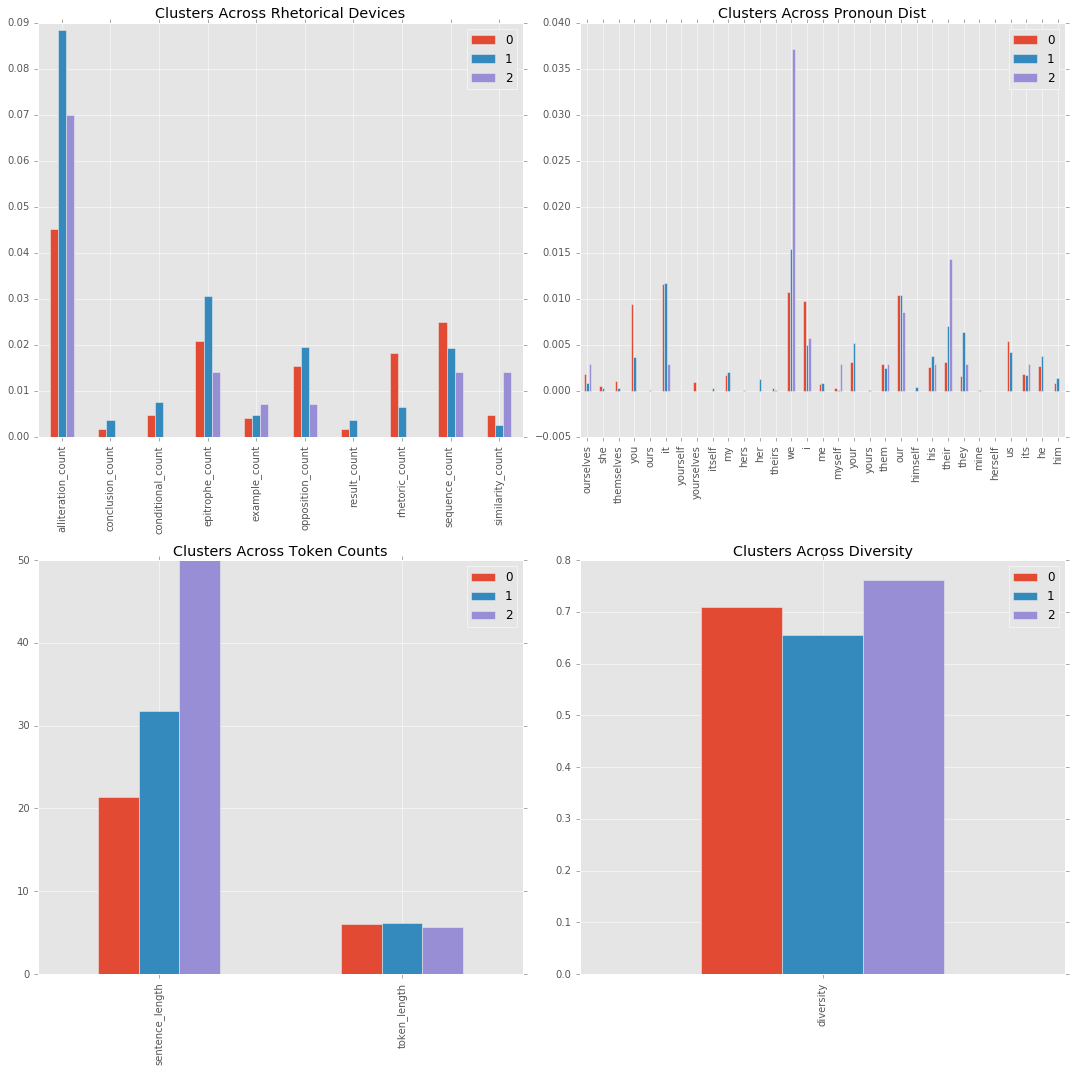

In [16]:
groups = {'Rhetorical Devices':devices_cols, 'Token Counts':counts_cols, 
          'Pronoun Dist':pronoun_cols, 'Diversity': other_dist}
war_clusters = cluster_speeches(metrics_df, devices_cols+counts_cols+pronoun_cols + other_dist, ['speaker','name'], 3, groups)

In [17]:
war_clusters[0]

,cluster,name,speaker
0,2,Beaches,Churchill
1,1,FinestHour,Churchill
2,0,PearlHarbor,FDR
3,0,LibertyDeath,Henry
4,1,Gettysburg,Lincoln
5,1,Sepulcher,Pericles
6,0,Infidels,Urban
7,1,BeYe,WillConq
8,1,SafeDem,Wilson


In [18]:
war_clusters[1][counts_cols]

,sentence_length,token_length
0,21.391795,6.096160
1,31.766539,6.112538
2,50.000000,5.685315


In [19]:
metrics_df[['speaker','sentence_length', 'token_length', 'num_tokens','alliteration_count']]

,speaker,sentence_length,token_length,num_tokens,alliteration_count
0,Churchill,50.000000,5.685315,350.0,0.069930
1,Churchill,30.379747,6.330558,4800.0,0.080313
2,FDR,22.230769,6.519164,578.0,0.038328
3,Henry,18.560000,5.938547,1392.0,0.040968
4,Lincoln,31.000000,5.565891,310.0,0.100775
5,Pericles,31.494737,5.976903,2992.0,0.080411
6,Urban,23.384615,5.830769,1520.0,0.056410
7,WillConq,27.608696,6.016667,635.0,0.091667
8,Wilson,38.349515,6.672673,3950.0,0.088889
